#HW4 - Gratings and Monochromators

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

##1
A light source is directed into a 100x100 mm diffraction grating at an agle of 20 degrees relative to the grating's normal. The grating has a ruling density of 1200 lines/mm. A 100 cm long screen is placed 50 cm from the grating and the dispersed spectrum is displayed on the screen. The screen is placed so it is directly in front of the grating. You observe the visible spectrum that runs from 400 nm to 800 nm.

##1a
Calculate the position of the different wavelengths of light and sketch the spectra that you will observe on the screen for all orders that appear (n=-1, 0, 1, and some of 2). (I get answers of -72.2 to off screen, 6.97 to 39.3, -18.2, 39.3 to off screen for n=-1 to 2 and for wavelengths of 400-800 nm).

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in arcsin


[0.0004, 0.0008, -50000, 50000]

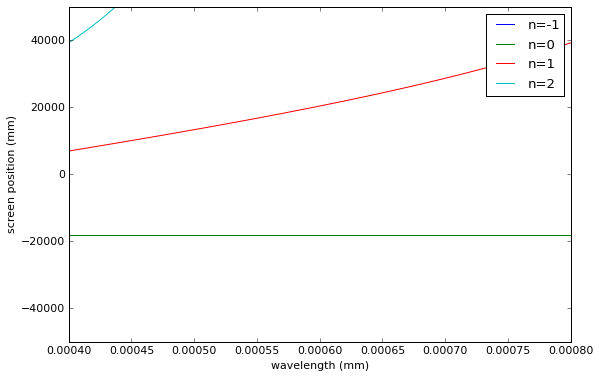

In [2]:
# function for spectral output of a grating
# 
def grating_spectra(n,wavelength,line_density,l):
    pi = 3.14159
    theta = 20.*np.pi/180.
    d = 1./line_density
    phi = np.arcsin(n*wavelength/d-np.sin(theta))
    screen_position = l*np.tan(phi)
    
    return screen_position

wave = np.arange(0.0004,0.0008,0.000001)
a = grating_spectra(-1,wave,1200.,50000.)
b = grating_spectra(0,wave,1200.,50000.)
c = grating_spectra(1,wave,1200.,50000.)
d = grating_spectra(2,wave,1200.,50000.)

plt.plot(wave,a)
plt.plot(wave,b)
plt.plot(wave,c)
plt.plot(wave,d)
plt.xlabel('wavelength (mm)')
plt.ylabel('screen position (mm)')
plt.legend(['n=-1','n=0','n=1','n=2'])
plt.axis([0.0004,0.0008,-50000,50000])


##1b
The grating is now replaced by a 100x100 mm grating with 300 lines/mm. How many orders appear? Sketch the spectra that will be observed on the screen.

-49288.2929128
-35786.9213685
-26047.8108342
-18198.5117133
-11385.1570148
-5127.76212069
899.138180022
6965.61873098
13350.9174436
20413.3838147
28712.3157832
39301.9986867
orders n=-3 to n=8


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in arcsin


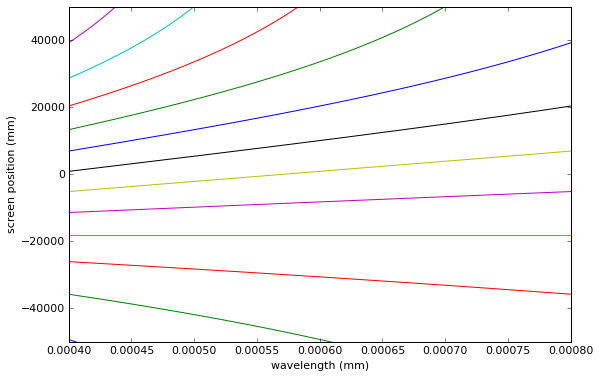

In [3]:
wave = np.arange(0.0004,0.0008,0.000001)
for n in range(-3,9):
    a = grating_spectra(n,wave,300.,50000.)
    plt.plot(wave,a)
    print a[0]

plt.xlabel('wavelength (mm)')
plt.ylabel('screen position (mm)')
#plt.legend(['n=-1','n=0','n=1','n=2'])
plt.axis([0.0004,0.0008,-50000,50000])
print "orders n=-3 to n=8"

##2
A detector is placed 26.9 cm from the center of the screen towards the side that shows the highest order (n=2).

##2a
What visible frequency (or frequencies) is (are) detected at that position for the 1200 line/mm grating?

In [4]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

xpos = grating_spectra(1,wave,1200.,50000.)
idx = find_nearest(xpos,26900)
print wave[idx]*1000000
print "nm"

680.0
nm


##2b
The grating is again replaced by the 300 line/mm grating. What wavelengths are now detected at that same position?

In [5]:
for n in [4,5,6]:
    xpos = grating_spectra(n,wave,300.,50000.)
    idx = find_nearest(xpos,26900)
    print wave[idx]*1000000


680.0
544.0
746.0


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in arcsin
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in absolute
  from ipykernel import kernelapp as app


##3
Compare the narrowest line $(\Delta \lambda)$, that could be measured with each grating at the position of the detector in part 2. Choose the one wavelength that can be observed by both gratings at the same position. Which grating has the highest resolution?

the narrowest line will be at the shallowest sloped n intersecting the screen at that value. So, for the first grating it will be n=1 and for the second it will be at n=4. This makes an incredible amount of sense, since the resolution equation $\lambda/(\Delta\lambda) = nN$ means that they look identical at n=1, 1200lines/mm and n=4, 300lines/mm. The resolution is technically the same, but I would choose the 1st grating because a lower order line is preferable.

-49288.2929128
-35786.9213685
-26047.8108342
-18198.5117133
-11385.1570148
-5127.76212069
899.138180022
6965.61873098
13350.9174436
20413.3838147
28712.3157832
39301.9986867


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in arcsin


[0.0004, 0.0008, -50000, 50000]

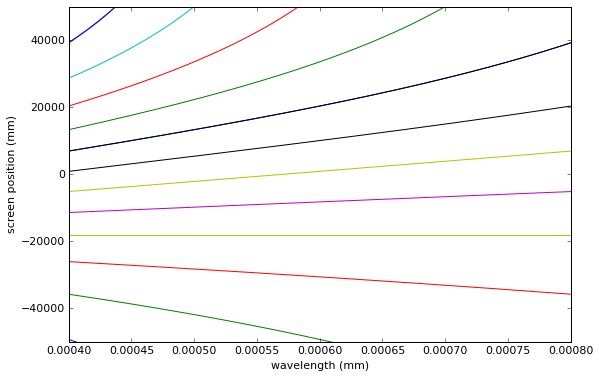

In [6]:
for n in range(-3,9):
    a = grating_spectra(n,wave,300.,50000.)
    plt.plot(wave,a)
    print a[0]
for n in range(0,3):
    a = grating_spectra(n,wave,1200.,50000.)
    plt.plot(wave,a)

plt.xlabel('wavelength (mm)')
plt.ylabel('screen position (mm)')
#plt.legend(['n=-1','n=0','n=1','n=2'])
plt.axis([0.0004,0.0008,-50000,50000])

##4 
The grating in question 1a is now placed inside a 0.3 meter focal length monochromator with a 100 micron entrance slit and a 200 micron exit slit.

##4a
Graph the spectrum of a monochromatic light source with a wavelength of 680 nm. (The graph can be hand-drawn but make sure the x-axis is labeled so one can see the width of the observed line).

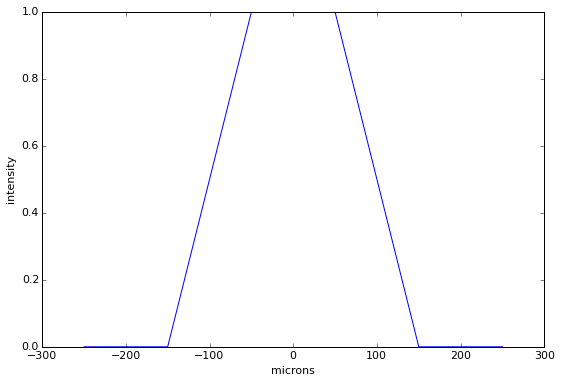

In [7]:
x = [-250, -150,-50,50,150,250]
y = [0,0,1,1,0,0]
plt.plot(x,y)
plt.xlabel("microns")
plt.ylabel("intensity")

##4b
What is the reciprocal linear dispersion of the instrument?

In [8]:
pi = 3.14159
line_density = 1200.
wavelength = .000680
theta = 20.*np.pi/180.
d = 1./line_density
n = 1
l = 300 #mm
phi = np.arcsin(n*wavelength/d-np.sin(theta))
dlambda_dx = d*np.cos(phi)/(n*l)
print dlambda_dx

2.44593246292e-06


##4c
What is the FWHM that you would expect if the monochromator scanned across the 680 nm line?

200 micrometers

##4d
What is the ultimate resolution that could be observed with very narrow slits?

1200

##4e
What slit width would be necessary to achieve the ultimate resolution?

In [9]:
delta_lambda = wavelength/(1200.)
slitw = delta_lambda*(1/dlambda_dx)
print slitw

0.231677151866


##4f
What wavelengths would have to be filtered out in order to insure that only 680 nm light was measured?

we want to filter out the wavelengths at 680/n

##5
[Ocean Optics](http://oceanoptics.com/) is a company that became very succesful by introducing a simple monochromator coupled to a CCD array detector. An array detector is at the heart of video cameras and typically contains 1024x1024 pixels on a 1"x1" square array. Their typical monochromator disperses the entire visible spectrum (400-800 nm) across the entire array and displays the intensity of each pixel on a computer screen. You can then see the changes in the light intensity at every wavelength as an experiment is conducted so it is a very versitile instrument. Assume the grating has 600 lines/mm and is 1" square. It is blazed for 500 nm.

##5a 
Calculate the focal length of the monochromator that will be appropriate for this application.

In [16]:
wave = np.arange(0.0004,0.0008,0.000001)
n = 1
line_density = 600.
pi = 3.14159
wave_B = 0.0005 #mm
d = 1./line_density
theta_inc = np.arccos(n*wave_B/(2*d*n*wave_B/(2*d)))+np.arcsin(n*wave_B/(2*d))
# hey, that's just the blaze angle again!

for l  in np.linspace(0,1.,10001):
    phi = np.arcsin(n*wave/d-np.sin(theta_inc))
    screen_position = l*np.tan(phi)
    if ((abs(screen_position[0]-screen_position[-1]) > 25.39) and (abs(screen_position[0]-screen_position[-1]) < 25.39)):
        print l

##5b
What width slit(s) would you install in the monochromator as the standard slit sold with each instrument? Would your monochromator require one slit or two?

In [17]:
w_pixel = 1.0*0.0254/1024
print w_pixel
print "it would only require one slit, since we want to look at all of these wavelengths simulaneously"

2.48046875e-05
it would only require one slit, since we want to look at all of these wavelengths simulaneously


##5c
What resolution would your commercial literature publish for the instrument you have built?

In [ ]:
theta_B = np.arcsin(wave_B/2*d)

##5d
What is its f/#?

In [19]:
f_num = 0.098/0.0254
print f_num

3.85826771654


##5e
Ocean Optics has just contact you to act as a consultant for their new line of spectrometers that has both good resolution and wide spectral coverage. They intend to create it using the same CCD array detector and two gratings. One grating disperses the light vertically and the other disperses it horizontally. This strategy is called cross-dispersion. The latter grating has 300 lines/mm and is 1" square but it is blazed for 6 microns (6000 nm). That means the visible light would be diffracted into high orders, e.g. 500 nm light would diffracted preferentially into 12th order since 500x12=6000. That has the unforunate consiquence that the 11th order of 545 nm and the 13th order of 462 nm would also appear at the same angle. The key to Ocean Optic's instrument is that the first grating would seperate the 11th, 12, 13th, etc. orders vertically. Thus the vertical dimension provides broad spectral coverage while the horizontal direction provides high resolution.

##5e part 1
Using the same focal length that you used for the previous problem, what resolution would you publish for this new instrument?

the resolution would be the same as in 5c, so

##5e part 2
Make a sketch that shows what the CCD display would look like. Include example wavelengths to identify how the wavelengths would be dispersed accross the face of the CCD.

on paper